In [ ]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth, drive
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
metadata_path = "/content/drive/My Drive/Colab Notebooks/EECS545_homeworks/FP/metadata.csv"

In [ ]:
%cd /content/drive/My Drive/Colab Notebooks/EECS545_homeworks/FP/

/content/drive/My Drive/Colab Notebooks/EECS545_homeworks/FP


In [ ]:
with open('all_data.txt', 'r') as f:
  lines = f.readlines()

In [ ]:
pip install bertopic

     |████████████████████████████████| 40kB 4.5MB/s 
     |████████████████████████████████| 15.3MB 211kB/s 
     |████████████████████████████████| 81kB 11.8MB/s 
     |████████████████████████████████| 13.2MB 250kB/s 
     |████████████████████████████████| 81kB 11.7MB/s 
     |████████████████████████████████| 6.4MB 50.1MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 2.1MB 51.4MB/s 
     |████████████████████████████████| 1.2MB 55.1MB/s 
     |████████████████████████████████| 1.2MB 48.7MB/s 
     |████████████████████████████████| 901kB 37.3MB/s 
     |████████████████████████████████| 3.3MB 46.2MB/s 
  Created wheel for hdbscan: filename=hdbscan-0.8.27-cp37-cp37m-linux_x86_64.whl size=2311636 sha256=492e90e371b6a78c3ab5aedda711cda25e2a3bbc54b12ccc53e0fe4b339887ee
  Stored in directory: /root/.cache/pip/wheels/42/63/fb/314ad6c3b270887a3ecb588b8e5aac50b0fad38f

In [ ]:
pip install bertopic[visualization]

In [ ]:
from bertopic import BERTopic

FileNotFoundError: ignored

In [ ]:
from sentence_transformers import SentenceTransformer

# Prepare embeddings
sentence_model = SentenceTransformer("distilbert-base-nli-mean-tokens", device='cuda')
embeddings = sentence_model.encode(lines[::20], show_progress_bar=True)

# Create topic model
model = BERTopic(verbose=True, calculate_probabilities=True)
topics, probabilities = model.fit_transform(lines[::20], embeddings)

NameError: ignored

In [ ]:
num_clusters_list = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40]
shrinking_value = 15
sil = []
sentence_model = SentenceTransformer("distilbert-base-nli-mean-tokens", device='cuda')
embeddings = sentence_model.encode(lines[::shrinking_value], show_progress_bar=True)

for num_clusters in num_clusters_list:
  # sentence_model = SentenceTransformer("distilbert-base-nli-mean-tokens", device='cuda')
  # embeddings = sentence_model.encode(lines[::shrinking_value], show_progress_bar=True)
  model = BERTopic(nr_topics=num_clusters)
  topics, probabilities = model.fit_transform(lines[::shrinking_value], embeddings)
  topics = np.array(topics)
  idx_valid = topics != -1
  # len(idx_valid)
  idx_valid.sum()
  sil.append(silhouette_score(embeddings[idx_valid], topics[idx_valid], metric = 'l2'))

plt.figure(figsize=(6,6))
plt.plot(num_clusters_list, sil, '-o')
plt.title('Title & Abstract')
plt.xlabel(r'Number of clusters k')
plt.ylabel('Sum of squared distance')

In [ ]:
model.get_topic_freq()

,Topic,Count
0,-1,4581
1,70,138
2,55,130
3,92,126
4,47,121
...,...,...
105,103,11
106,6,11
107,93,10
108,18,10


In [ ]:
model.get_topic(40)

[('he', 0.025297967057375945),
 ('case', 0.02235967045627968),
 ('patient', 0.020250441871292192),
 ('his', 0.018076769903982725),
 ('man', 0.017551909047751103),
 ('report', 0.01625363589854677),
 ('acute', 0.014700029060959236),
 ('male', 0.012325266883266019),
 ('presented', 0.01145190582322216),
 ('after', 0.011110652044176458),
 ('symptoms', 0.01004067605097415),
 ('pbmt', 0.008430242638387406),
 ('severe', 0.008395168721586606),
 ('abdominal', 0.008347886444493632),
 ('myocarditis', 0.008284380014665154),
 ('days', 0.00810205176072796),
 ('infection', 0.008018094782749556),
 ('syndrome', 0.00778442912514468),
 ('pain', 0.0077353236326447375),
 ('left', 0.0076921529228711795),
 ('artery', 0.007575170404870446),
 ('respiratory', 0.007403863235724057),
 ('chest', 0.007379251116428299),
 ('presentation', 0.007286628868853962),
 ('no', 0.007275697844650136),
 ('pulmonary', 0.007269601461927712),
 ('pneumonia', 0.007254719240387237),
 ('diagnosed', 0.007104882007602062),
 ('eye', 0.007

In [ ]:
model.visualize_topics()

In [ ]:
import numpy as np
topics = np.array(topics)
idx_valid = topics != -1
# len(idx_valid)
idx_valid.sum()

3581

In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score(embeddings[idx_valid], topics[idx_valid], metric = 'l2')
score

0.027544096

In [ ]:
from sentence_transformers import SentenceTransformer

# Prepare embeddings
sentence_model = SentenceTransformer("distilbert-base-nli-mean-tokens", device='cuda')
embeddings = sentence_model.encode(lines[::10], show_progress_bar=True)

# Create topic model
model = BERTopic(nr_topics=3)
topics, probabilities = model.fit_transform(lines[::10], embeddings)

2021-04-24 22:59:12,928 - BERTopic - Reduced dimensionality with UMAP
2021-04-24 22:59:13,997 - BERTopic - Clustered UMAP embeddings with HDBSCAN
2021-04-24 22:59:25,534 - BERTopic - Reduced number of topics from 166 to 4


In [ ]:
topics = np.array(topics)
idx_valid = topics != -1
# len(idx_valid)
idx_valid.sum()

2352

In [ ]:
score = silhouette_score(embeddings[idx_valid], topics[idx_valid], metric = 'l2')
score

0.061636034

2021-04-24 23:06:47,290 - BERTopic - Reduced dimensionality with UMAP
2021-04-24 23:06:47,855 - BERTopic - Clustered UMAP embeddings with HDBSCAN
2021-04-24 23:06:55,737 - BERTopic - Reduced number of topics from 139 to 3
2021-04-24 23:07:05,137 - BERTopic - Reduced dimensionality with UMAP
2021-04-24 23:07:05,698 - BERTopic - Clustered UMAP embeddings with HDBSCAN
2021-04-24 23:07:13,205 - BERTopic - Reduced number of topics from 110 to 5
2021-04-24 23:07:22,767 - BERTopic - Reduced dimensionality with UMAP
2021-04-24 23:07:23,422 - BERTopic - Clustered UMAP embeddings with HDBSCAN
2021-04-24 23:07:31,070 - BERTopic - Reduced number of topics from 124 to 7
2021-04-24 23:07:40,837 - BERTopic - Reduced dimensionality with UMAP
2021-04-24 23:07:41,410 - BERTopic - Clustered UMAP embeddings with HDBSCAN
2021-04-24 23:07:49,185 - BERTopic - Reduced number of topics from 123 to 9
2021-04-24 23:07:58,571 - BERTopic - Reduced dimensionality with UMAP
2021-04-24 23:07:59,148 - BERTopic - Clust

Text(0, 0.5, 'Sum of squared distance')

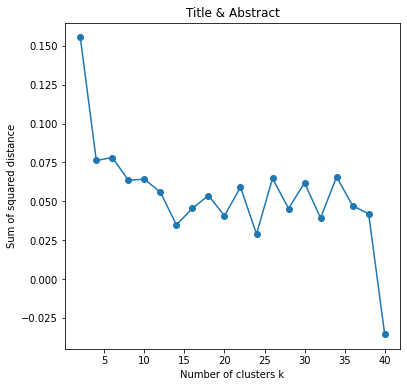

In [ ]:
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt
num_clusters_list = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40]
shrinking_value = 15
sil = []
sentence_model = SentenceTransformer("distilbert-base-nli-mean-tokens", device='cuda')
embeddings = sentence_model.encode(lines[::shrinking_value], show_progress_bar=True)

for num_clusters in num_clusters_list:
  # sentence_model = SentenceTransformer("distilbert-base-nli-mean-tokens", device='cuda')
  # embeddings = sentence_model.encode(lines[::shrinking_value], show_progress_bar=True)
  model = BERTopic(nr_topics=num_clusters)
  topics, probabilities = model.fit_transform(lines[::shrinking_value], embeddings)
  topics = np.array(topics)
  idx_valid = topics != -1
  # len(idx_valid)
  idx_valid.sum()
  sil.append(silhouette_score(embeddings[idx_valid], topics[idx_valid], metric = 'l2'))

plt.figure(figsize=(6,6))
plt.plot(num_clusters_list, sil, '-o')
plt.title('Title & Abstract')
plt.xlabel(r'Number of clusters k')
plt.ylabel('Sum of squared distance')